In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import glob  ###
data_path = Path('data') # change the data path here 


In [76]:
# IMAGES
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import torch
img_path ="data_HR/data/images/999.npy"
img = np.load(str(img_path))
print(img.shape)
print(np.min(img),np.max(img),np.mean(img), img.size)

(512, 512, 5)
4532 65226 18732.146856689455 1310720


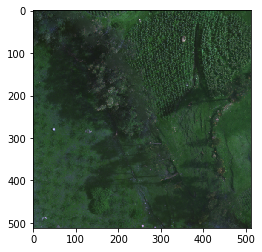

In [77]:
img = (img[:,:,:3]).astype(np.float)
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))
plt.show()


(512, 512, 3)


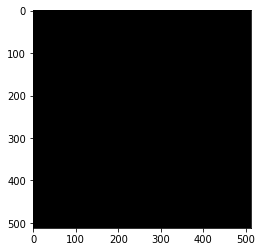

In [32]:
# MASKS
mask = np.load(str(img_path).replace('images', 'masks'), 0)
mask=(mask > 0).astype(np.uint8)
plt.imshow(mask)

print(mask.shape)

## Split: Train_val + Test

In [48]:
from get_train_val_1 import split_train_val
#from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
#from copy_samples_3 import n_samples
split_train_val(original_dataset_dir= 'data_HR/data/images',base_dir = "data_HR",validation_split = 0.10, train_file='train_val',val_file='test')

2770 2493 277


In [49]:
obtained_mask(mode="val",original_dataset_dir_train="data_HR/train_val/images/",label_dir_train='data_HR/data/masks/',data_dir_train="data_HR/train_val/masks" ,original_dataset_dir_val="data_HR/test/images",label_dir_val='data_HR/data/masks/',data_dir_val="data_HR/test/masks/")

data_HR/train_val/images/
data_HR/test/images


## Plotting

In [22]:
import helper
import numpy as np
def plot_prediction(stage='test',name_file='_100_percent',out_file='HR',name_model='UNet11',fold_out=0,fold_in=0, count=277): # #LR •dist
    
    val_file = (("predictions_{}/inputs_{}{}_{}_{}_fold{}.npy").format(out_file, stage, name_file, count,name_model,fold_out))
    pred_file =(("predictions_{}/pred_{}{}_{}_{}_fold{}.npy").format(out_file, stage, name_file, count,name_model,fold_out))
    label_file = (("predictions_{}/labels_{}{}_{}_{}_fold{}.npy").format(out_file, stage, name_file, count,name_model,fold_out))

    val_images = np.load(val_file)
    pred_images = np.load(pred_file)
    val_label = np.load(label_file)
    pred_images[0,0,:,:,:].shape
    print('img',val_images.shape)
    print('pred',pred_images.shape)
    print('label',val_label.shape)

    input_images_rgb = [helper.reverse_transform(x) for x in val_images[:10,0,:3,:,:]]   #new metrics
    # Map each channel (i.e. class) to each color
    target_masks_rgb = [helper.masks_to_colorimg(x) for x in val_label[:10,0,:3,:,:]]
    pred_rgb = [helper.masks_to_colorimg(x) for x in pred_images[:10,0,:,:,:]]
    
    print('img',np.shape(input_images_rgb),'pred',np.shape(pred_rgb) , 'label',np.shape(target_masks_rgb))
    
    return val_images,pred_images,val_label, input_images_rgb,target_masks_rgb,pred_rgb
val_images,pred_images,val_label, input_images_rgb,target_masks_rgb,pred_rgb=plot_prediction()

img (277, 1, 5, 512, 512)
pred (277, 1, 3, 512, 512)
label (277, 1, 3, 512, 512)
img (10, 512, 512, 3) pred (10, 512, 512, 3) label (10, 512, 512, 3)


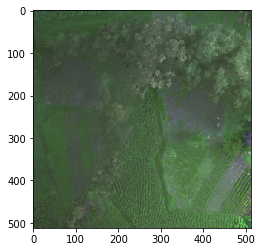

In [23]:
plt.imshow(input_images_rgb[2])
plt.show()

ValueError: not enough values to unpack (expected 3, got 2)

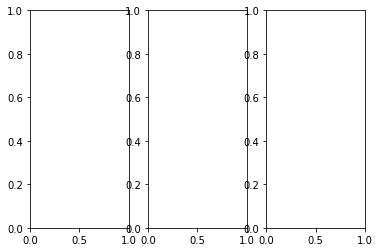

In [46]:
lb=val_label[2,0,:,:,:].transpose(1,2,0)
ax0,ax1,ax2 = plt.subplots(nrows=1, ncols=3)

ax0.plot(lb[:,:,0])
ax1.plot(lb[:,:,1])
ax2.plot(lb[:,:,2])


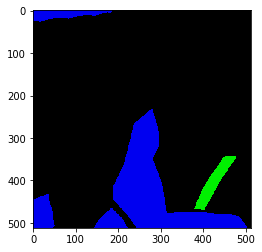

In [24]:
plt.imshow(target_masks_rgb[2])
plt.show()

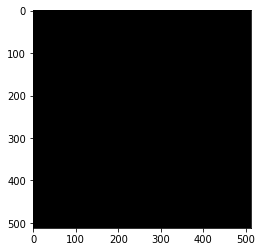

In [26]:
plt.imshow(pred_rgb[1])
plt.show()


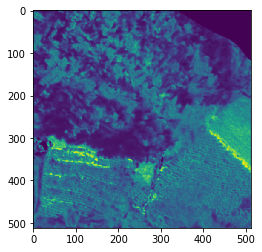

In [47]:
pd=pred_images[3,0,:,:,:].transpose(1,2,0)
plt.imshow(pd[:,:,0])
plt.show()

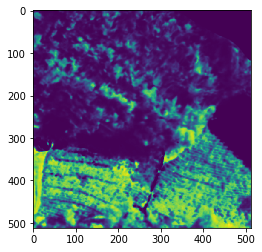

In [50]:
pd=pred_images[3,0,:,:,:].transpose(1,2,0)
plt.imshow(pd[:,:,1])
plt.show()

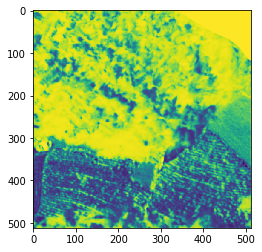

0.5 1.1080804e-18 [[[1.6856399e-01 6.7516603e-02 4.2024162e-01]
  [9.6359149e-02 2.7214535e-02 4.6391904e-01]
  [9.3690671e-02 1.9253518e-02 4.6723279e-01]
  ...
  [2.2074707e-02 2.1076349e-03 4.9375162e-01]
  [3.0024124e-02 4.6140463e-03 4.9094152e-01]
  [8.1111997e-02 2.1612486e-02 4.7079819e-01]]

 [[9.1867246e-02 3.3741079e-02 4.6349630e-01]
  [2.8788606e-02 7.4897953e-03 4.9052677e-01]
  [2.8761599e-02 5.2170809e-03 4.9113101e-01]
  ...
  [1.7617011e-03 1.1733404e-04 4.9952897e-01]
  [3.3562942e-03 3.9187068e-04 4.9905837e-01]
  [2.2669634e-02 4.4697844e-03 4.9298158e-01]]

 [[9.9537238e-02 3.5970431e-02 4.6008608e-01]
  [3.7559014e-02 9.2733828e-03 4.8760384e-01]
  [4.4510741e-02 8.6558070e-03 4.8577774e-01]
  ...
  [2.5534933e-03 1.0175230e-04 4.9933362e-01]
  [4.2993021e-03 3.8999142e-04 4.9882019e-01]
  [2.7232900e-02 4.0879324e-03 4.9184406e-01]]

 ...

 [[1.8244731e-01 2.3934364e-01 3.1609112e-01]
  [1.3642555e-01 2.6572123e-01 3.2438898e-01]
  [1.2765066e-01 2.6825094e-01 3

In [58]:
pd=pred_images[3,0,:,:,:].transpose(1,2,0)
plt.imshow(pd[:,:,2])
plt.show()
print(np.max(pd), np.min(pd),pd)

## print the size

In [75]:
"""
Adaptate from https://gist.github.com/jdhao/9a86d4b9e4f79c5330d54de991461fd6
Calculate Mean and Std per channel
in this script, we calculate the image per channel mean and standard
deviation in the training set, do not calculate the statistics on the
whole dataset, as per here http://cs231n.github.io/neural-networks-2/#datapre
"""
from get_train_test_kfold import get_split_out, percent_split, get_split_in

import numpy as np
from os import listdir
from os.path import join, isdir
import glob 
import cv2
import timeit
from pathlib import Path

# number of channels of the dataset image, 4 channels (RGB NIR)


    
CHANNEL_NUM = 5


def size_img(im_pths, maximunValue): ##give the names 


    i=1
    len(im_pths)
    for path in im_pths:
        im = np.load(path) #.transpose(1,2,0) # 
        #print(np.min(im),np.max(im))
        print(path)
        print(np.shape(im))
        print(i)
        i+=1

def meanstd(train_root,val_root, test_root,rootdata='data_HR'): #name_file,
    data_path = Path(rootdata)
    #train_root= str(data_path/'train{}'/'images').format(name_file)
    #val_root= str(data_path/'val{}'/'images').format(name_file)
 #************************************************************ 
    #test_raiz= str(data_path/'test{}'/'images').format(name_file)
    #test_raiz= str(data_path/'test_HR_916'/'images')

    #get_files_path = str(test_raiz) + "/*.npy"
    #test_root = np.array(sorted(glob.glob(get_files_path)))
 #************************************************************ 
    
    data_all_raiz=str(data_path/'data'/'images')  #'/home/jgonzalez/Test_2019/Test_PreProcessing/data' #all the dataset
    get_files_path = str(data_all_raiz) + "/*.npy"
    data_all_root = np.array(sorted(glob.glob(get_files_path)))
    
 
    

    
    mean_train, std_train = size_img(train_root,65535) #max 3521
   # mean_val, std_val = size_img(val_root,65535)
   # mean_test, std_test = size_img(test_root,65535) 
   # mean_all, std_all = size_img(data_all_root,65535)



data_path = Path('data_HR') # change the data path here 

train_val_file_names=np.array(sorted(glob.glob(str(data_path/'train_val'/'images')+ "/*.npy")))
test_file_names =  np.array(sorted(glob.glob(str(data_path/'test'/'images') + "/*.npy")))
train_file_names,val_file_names = get_split_in(train_val_file_names,0)    #train_file_names, val_file_names = get_files_names(data_path,name_file)
#i=0
#for path in train_file_names:
 #       print( path)
  #      print(i)
   #     i+=1
        
max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path)) #_60 --data_HR, data_LR


data_HR/train_val/images/1.npy
(512, 512, 5)
1
data_HR/train_val/images/100.npy
(512, 512, 5)
2
data_HR/train_val/images/1000.npy
(512, 512, 5)
3
data_HR/train_val/images/1001.npy
(512, 512, 5)
4
data_HR/train_val/images/1002.npy
(512, 512, 5)
5
data_HR/train_val/images/1003.npy
(512, 512, 5)
6
data_HR/train_val/images/1004.npy
(512, 512, 5)
7
data_HR/train_val/images/1005.npy
(512, 512, 5)
8
data_HR/train_val/images/1006.npy
(512, 512, 5)
9
data_HR/train_val/images/1007.npy
(512, 512, 5)
10
data_HR/train_val/images/1008.npy
(512, 512, 5)
11
data_HR/train_val/images/1009.npy
(512, 512, 5)
12
data_HR/train_val/images/1010.npy
(512, 512, 5)
13
data_HR/train_val/images/1011.npy
(512, 512, 5)
14
data_HR/train_val/images/1012.npy
(512, 512, 5)
15
data_HR/train_val/images/1013.npy
(512, 512, 5)
16
data_HR/train_val/images/1015.npy
(512, 512, 5)
17
data_HR/train_val/images/1017.npy
(512, 512, 5)
18
data_HR/train_val/images/1018.npy
(512, 512, 5)
19
data_HR/train_val/images/102.npy
(512, 512, 

TypeError: 'NoneType' object is not iterable

In [69]:
len(train_file_names), len(val_file_names), len(test_file_names)

(1994, 499, 277)

In [70]:
1994+499+277


2770

## only tests nmean

In [27]:
import torch
rootdata='data_HR'
data_path = Path(rootdata)

data_all_raiz=str(data_path/'train_val'/'images')  #'/home/jgonzalez/Test_2019/Test_PreProcessing/data' #all the dataset
get_files_path = str(data_all_raiz) + "/*.npy"
data_all_root = np.array(sorted(glob.glob(get_files_path)))
#loader = np.load(path) #.transpose(1,2,0) # 
        
mean = 0.
meansq = 0.
for path_data in data_all_root:
    data = np.load(path_data)
    mean = data.mean()
    meansq = (data**2).mean()

std = torch.sqrt(meansq - mean**2)
print("mean: " + str(mean))
print("std: " + str(std))
print()


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not numpy.float64

In [28]:
mean = 0.
std = 0.
nb_samples = 0.
for path_data in data_all_root:
    data = np.load(path_data)

    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

TypeError: 'int' object is not callable

In [45]:
"""
Adaptate from https://gist.github.com/jdhao/9a86d4b9e4f79c5330d54de991461fd6
Calculate Mean and Std per channel
in this script, we calculate the image per channel mean and standard
deviation in the training set, do not calculate the statistics on the
whole dataset, as per here http://cs231n.github.io/neural-networks-2/#datapre
"""
from get_train_test_kfold import get_split_out, percent_split, get_split_in

import numpy as np
from os import listdir
from os.path import join, isdir
import glob 
import cv2
import timeit
from pathlib import Path

# number of channels of the dataset image, 4 channels (RGB NIR)


def find_max(im_pths):

    #get_files_path = str(data_root) + "/*.npy"
    #im_pths = np.array(sorted(glob.glob(get_files_path)))
    
    minimo_pixel=[]
    maximo_pixel=[]
    #mean_pixel= []
    size=len(im_pths)
    #print('fid_max_size',size)

    for i in im_pths:
        img = np.load(str(i))
        #print(np.max(img))
        img=img #.transpose((2, 1, 0))
        #print(np.shape(img))
        minimo_pixel.append(np.min(img))
        maximo_pixel.append(np.max(img))
        #mean_pixel.append(np.mean(img[:,:,0]))
    #print(np.mean(mean_pixel))
    return   np.min(minimo_pixel),np.max(maximo_pixel), size
        

    
CHANNEL_NUM = 6


def cal_dir_stat(im_pths, maximunValue): ##give the names 
    pixel_num = 0 # store all pixel number in the dataset
    channel_sum = np.zeros(CHANNEL_NUM)
    channel_sum_squared = np.zeros(CHANNEL_NUM)

    #get_files_path = str(data_root) + "/*.npy"
    #im_pths = np.array(sorted(glob.glob(get_files_path)))
    
    #print('cal_shape',np.shape(im_pths))


    for path in im_pths:
        im = np.load(path) #.transpose(1,2,0) # 
        print(np.shape(im))

        im = im/maximunValue
        pixel_num += (im.size/CHANNEL_NUM)
        channel_sum += np.sum(im, axis=(0, 1))
        channel_sum_squared += np.sum(np.square(im), axis=(0, 1))

    rgb_mean = channel_sum / pixel_num
    rgb_std = np.sqrt(channel_sum_squared / pixel_num - np.square(rgb_mean))
       
    return rgb_mean, rgb_std


def meanstd(train_root,val_root, test_root,rootdata='data_HR'): #name_file,
    data_path = Path(rootdata)
    #train_root= str(data_path/'train{}'/'images').format(name_file)
    #val_root= str(data_path/'val{}'/'images').format(name_file)
 #************************************************************ 
    #test_raiz= str(data_path/'test{}'/'images').format(name_file)
    #test_raiz= str(data_path/'test_HR_916'/'images')

    #get_files_path = str(test_raiz) + "/*.npy"
    #test_root = np.array(sorted(glob.glob(get_files_path)))
 #************************************************************ 
    
    data_all_raiz=str(data_path/'data'/'images')  #'/home/jgonzalez/Test_2019/Test_PreProcessing/data' #all the dataset
    get_files_path = str(data_all_raiz) + "/*.npy"
    data_all_root = np.array(sorted(glob.glob(get_files_path)))
    
    minimo_pixel_train,maximo_pixel_train,size_train = find_max(train_root)
    minimo_pixel_val,maximo_pixel_val,size_val = find_max(val_root)
    minimo_pixel_test,maximo_pixel_test,size_test = find_max(test_root)
    
    
    minimo_pixel_all,maximo_pixel_all,size_all = find_max(data_all_root)

    print(minimo_pixel_all,maximo_pixel_all,size_all)
    
    start = timeit.default_timer()
    mean_train, std_train = cal_dir_stat(train_root,maximo_pixel_all) #max 3521
    mean_val, std_val = cal_dir_stat(val_root,maximo_pixel_all)
    mean_test, std_test = cal_dir_stat(test_root,maximo_pixel_all) 
    mean_all, std_all = cal_dir_stat(data_all_root,maximo_pixel_all)

    end = timeit.default_timer()
    print("elapsed time: {}".format(end-start))
    print('Train:',str(data_path),size_train, 'min ',np.min(minimo_pixel_train),'max ',maximo_pixel_train) # 0-1
    print("mean:{}\nstd:{}".format(mean_train, std_train))

    print('Val:',str(data_path),size_val,'min ',np.min(minimo_pixel_val),'max ',maximo_pixel_val) # 0-1
    print("mean:{}\nstd:{}".format(mean_val, std_val))

    print('Test:',str(data_path),size_test,'-min ',np.min(minimo_pixel_test),'max ',maximo_pixel_test) # 0-1
    print("mean:{}\nstd:{}".format(mean_test, std_test))

        
    print('All:',str(data_path),size_all,'min ',np.min(minimo_pixel_all),'max ',maximo_pixel_all) # 0-1
    
    print("mean:{}\nstd:{}".format(mean_all, std_all))
    return maximo_pixel_all, mean_train, std_train

data_path = Path('data_HR') # change the data path here 

train_val_file_names=np.array(sorted(glob.glob(str(data_path/'train_val'/'images')+ "/*.npy")))
test_file_names =  np.array(sorted(glob.glob(str(data_path/'test'/'images') + "/*.npy")))
train_file_names,val_file_names = get_split_in(train_val_file_names,0)    #train_file_names, val_file_names = get_files_names(data_path,name_file)

max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path)) #_60 --data_HR, data_LR


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.